In [1]:
import torch
from torch.functional import F
import torchvision.transforms as T

import numpy as np
import matplotlib.pyplot as plt

import src.config as cfg
import src.LoadData as LD
from src.model import Generator, Discriminator
from src.train_model import train, check_accuracy, generate_samples

%load_ext autoreload
%autoreload 2



# Loading the data

In [2]:
MNIST_train = LD.load_mnist(cfg.MNIST_PATH,"train")
MNIST_test = LD.load_mnist(cfg.MNIST_PATH,"t10k")
std = np.std(MNIST_train[0])
mean = np.mean(MNIST_train[0])
MNIST_train, MNIST_validation = LD.split(MNIST_train,cfg.TRAIN_VAL_SPLIT)

mean: 72.94035223214286
std: 90.02118235130519
(28, 28, 1)


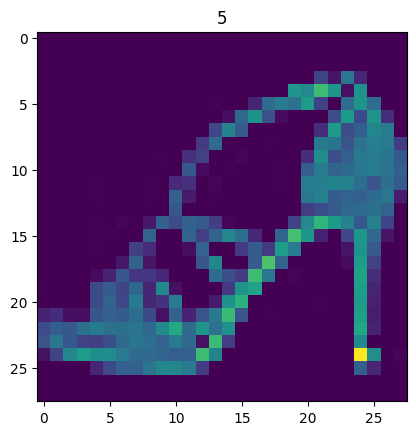

In [3]:
plt.imshow(MNIST_train[0][4])
plt.title(MNIST_train[1][4])
print("mean:",mean)
print("std:",std)
print(MNIST_train[0][4].shape)

In [4]:
transformations = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=0, std=1)
])

In [5]:

trainDS,trainLoader = LD.get_dataloader(MNIST_train,transformations,cfg.BATCH_SIZE,shuffle=True)
valDS,valLoader = LD.get_dataloader(MNIST_validation,transformations,cfg.BATCH_SIZE,shuffle=True)
testDS,testLoader = LD.get_dataloader(MNIST_test,transformations,cfg.BATCH_SIZE,shuffle=True)


# Model

In [6]:
D_model = Discriminator()
G_model = Generator(cfg.NOISE_DIM)

D_optimizer = torch.optim.Adam(D_model.parameters(),lr=cfg.D_LEARNING_RATE,betas=(cfg.BETA1,cfg.BETA2))
G_optimizer = torch.optim.Adam(G_model.parameters(),lr=cfg.G_LEARNING_RATE,betas=(cfg.BETA1,cfg.BETA2))

D_lossFunction = F.cross_entropy
G_lossFunction = F.cross_entropy




EPOCH 0
D loss: = 1.1499, G loss:  1.2329
D train accuracy: 67.69%, G train accuracy: (4.07)%
D val accuracy: 67.79%, G val accuracy: (3.90)%
D lr: 4e-05 G_lr 4e-05


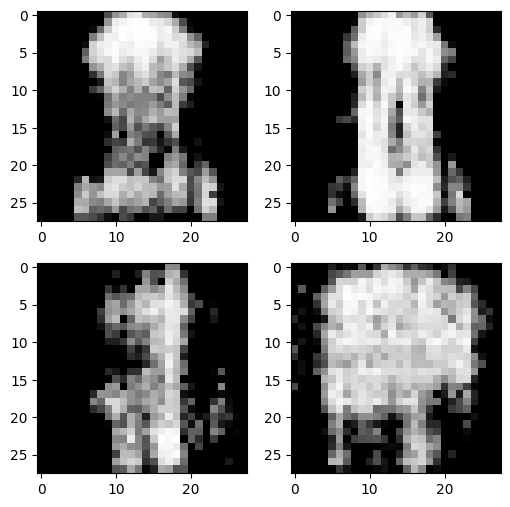

epoch time: 15.781702756881714

EPOCH 1
D loss: = 0.9328, G loss:  1.2855
epoch time: 6.299532175064087

EPOCH 2
D loss: = 1.2291, G loss:  1.2511
epoch time: 6.634232044219971

EPOCH 3
D loss: = 0.8692, G loss:  1.2792
epoch time: 6.58844780921936

EPOCH 4
D loss: = 0.9823, G loss:  1.2833
epoch time: 7.5630292892456055

EPOCH 5
D loss: = 0.9281, G loss:  1.2887
D train accuracy: 75.33%, G train accuracy: (2.81)%
D val accuracy: 74.64%, G val accuracy: (2.74)%
D lr: 4e-05 G_lr 4e-05


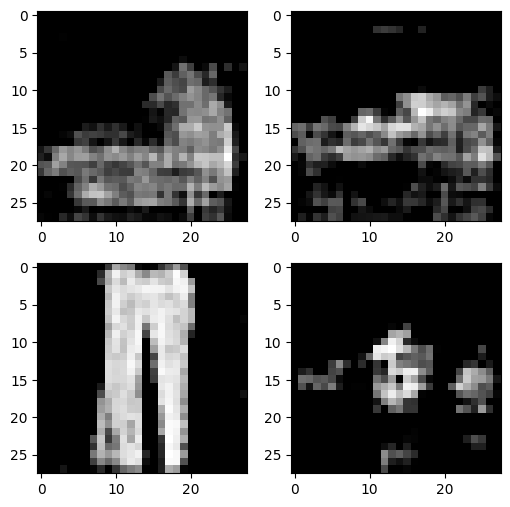

epoch time: 14.170259714126587

EPOCH 6
D loss: = 0.9620, G loss:  1.2909
epoch time: 7.35698676109314

EPOCH 7
D loss: = 1.6301, G loss:  1.2431
epoch time: 7.367986679077148

EPOCH 8
D loss: = 0.9755, G loss:  0.9953
epoch time: 7.343987226486206

EPOCH 9
D loss: = 1.0876, G loss:  1.1467
epoch time: 7.6245832443237305

EPOCH 10
D loss: = 1.2521, G loss:  1.2861
D train accuracy: 67.32%, G train accuracy: (11.94)%
D val accuracy: 66.47%, G val accuracy: (11.98)%
D lr: 4e-05 G_lr 4e-05


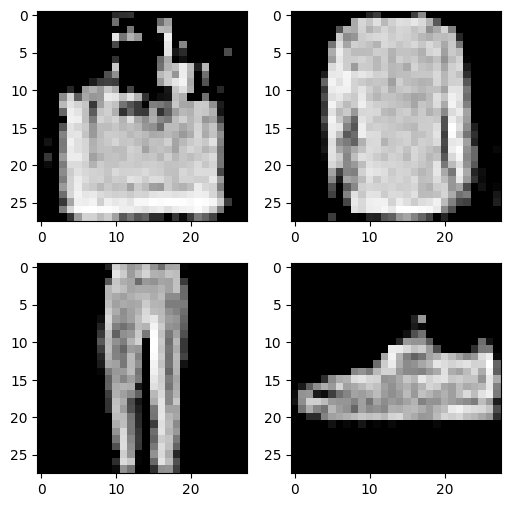

epoch time: 13.955658674240112

EPOCH 11
D loss: = 0.8706, G loss:  1.2784
epoch time: 8.962809085845947

EPOCH 12
D loss: = 1.4105, G loss:  1.0732
epoch time: 7.820433139801025

EPOCH 13
D loss: = 1.0194, G loss:  1.1311
epoch time: 7.66683292388916

EPOCH 14
D loss: = 1.2394, G loss:  1.3051
epoch time: 7.698090314865112

EPOCH 15
D loss: = 0.9452, G loss:  1.2425
D train accuracy: 73.19%, G train accuracy: (4.35)%
D val accuracy: 71.65%, G val accuracy: (4.11)%
D lr: 4e-05 G_lr 4e-05


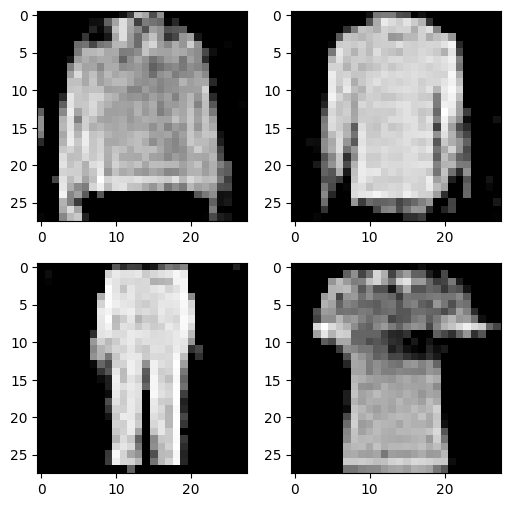

epoch time: 12.559521436691284

EPOCH 16
D loss: = 1.6411, G loss:  1.2280
epoch time: 9.072483539581299

EPOCH 17
D loss: = 1.1563, G loss:  1.2904
epoch time: 7.75851035118103

EPOCH 18
D loss: = 0.9968, G loss:  1.2748
epoch time: 7.678114175796509

EPOCH 19
D loss: = 0.9044, G loss:  1.2291
epoch time: 7.684401273727417

EPOCH 20
D loss: = 1.2198, G loss:  1.2332
D train accuracy: 69.82%, G train accuracy: (0.65)%
D val accuracy: 67.24%, G val accuracy: (0.66)%
D lr: 4e-05 G_lr 4e-05


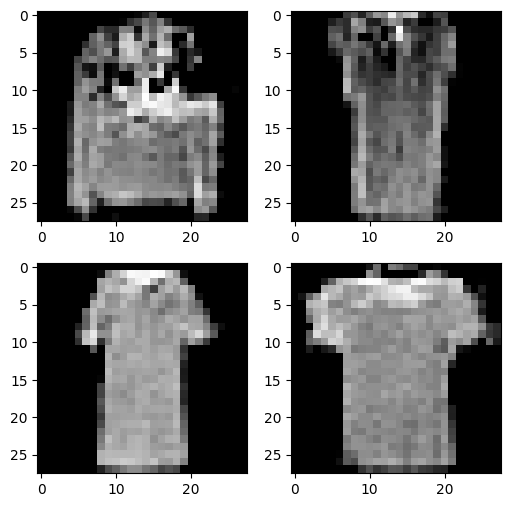

epoch time: 12.52759599685669

EPOCH 21
D loss: = 1.0200, G loss:  1.1927
epoch time: 9.046042919158936

EPOCH 22
D loss: = 1.0636, G loss:  1.1852
epoch time: 7.735484600067139

EPOCH 23
D loss: = 1.2278, G loss:  1.2267
epoch time: 7.660031318664551

EPOCH 24
D loss: = 0.8812, G loss:  1.2981
epoch time: 7.686986207962036

EPOCH 25
D loss: = 1.2039, G loss:  1.2898
D train accuracy: 72.94%, G train accuracy: (6.76)%
D val accuracy: 71.12%, G val accuracy: (6.74)%
D lr: 4e-05 G_lr 4e-05


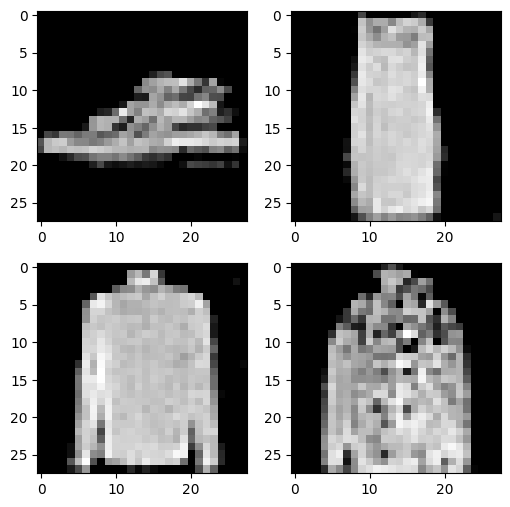

epoch time: 12.479848384857178

EPOCH 26
D loss: = 1.0257, G loss:  1.2609
epoch time: 6.629844427108765

EPOCH 27
D loss: = 1.2192, G loss:  1.2436
epoch time: 6.987135648727417

EPOCH 28
D loss: = 0.9580, G loss:  1.3060
epoch time: 7.6156134605407715

EPOCH 29
D loss: = 1.3000, G loss:  1.0993
epoch time: 7.63848614692688

EPOCH 30
D loss: = 0.9557, G loss:  1.2936
D train accuracy: 70.32%, G train accuracy: (2.73)%
D val accuracy: 66.63%, G val accuracy: (2.88)%
D lr: 4e-05 G_lr 4e-05


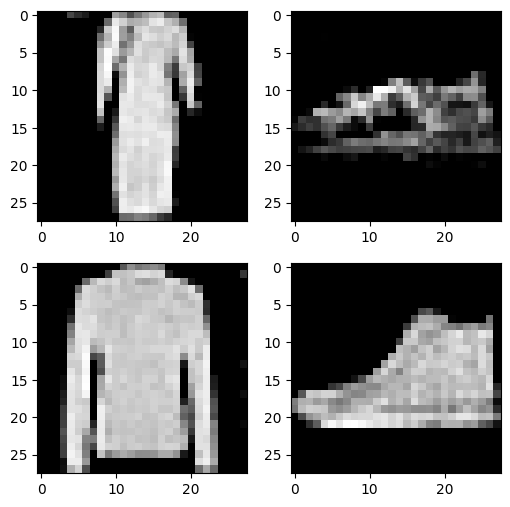

epoch time: 12.56966233253479

EPOCH 31
D loss: = 1.3715, G loss:  1.2596
epoch time: 9.048483610153198

EPOCH 32
D loss: = 1.3600, G loss:  1.2483
epoch time: 7.6666014194488525

EPOCH 33
D loss: = 0.9543, G loss:  1.2959
epoch time: 9.13851261138916

EPOCH 34
D loss: = 1.2765, G loss:  1.3036
epoch time: 9.087984085083008

EPOCH 35
D loss: = 1.1521, G loss:  1.2285
D train accuracy: 68.64%, G train accuracy: (1.46)%
D val accuracy: 64.46%, G val accuracy: (1.53)%
D lr: 4e-05 G_lr 4e-05


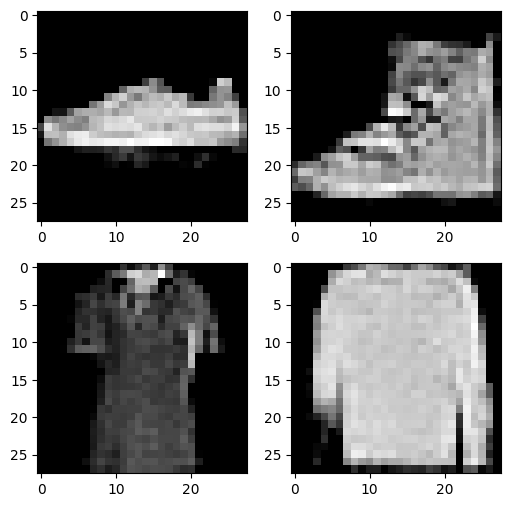

epoch time: 14.143110275268555

EPOCH 36
D loss: = 1.3412, G loss:  1.2796
epoch time: 9.06998324394226

EPOCH 37
D loss: = 1.3034, G loss:  1.0767
epoch time: 9.079517841339111

EPOCH 38
D loss: = 1.4440, G loss:  1.2348
epoch time: 9.05048394203186

EPOCH 39
D loss: = 0.9910, G loss:  1.2380
epoch time: 9.047983884811401

EPOCH 40
D loss: = 0.9484, G loss:  1.2704
D train accuracy: 69.53%, G train accuracy: (2.63)%
D val accuracy: 65.69%, G val accuracy: (2.64)%
D lr: 4e-05 G_lr 4e-05


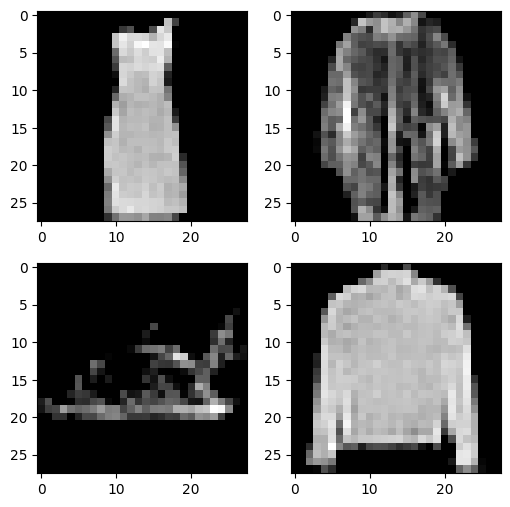

epoch time: 14.047133207321167

EPOCH 41
D loss: = 1.2347, G loss:  1.2482
epoch time: 9.049018383026123

EPOCH 42
D loss: = 1.1112, G loss:  1.1732
epoch time: 9.060797929763794

EPOCH 43
D loss: = 1.2604, G loss:  1.3084
epoch time: 9.166983366012573

EPOCH 44
D loss: = 1.0701, G loss:  1.0600
epoch time: 9.055984258651733

EPOCH 45
D loss: = 1.1425, G loss:  1.2989
D train accuracy: 70.80%, G train accuracy: (1.92)%
D val accuracy: 66.17%, G val accuracy: (1.72)%
D lr: 4e-05 G_lr 4e-05


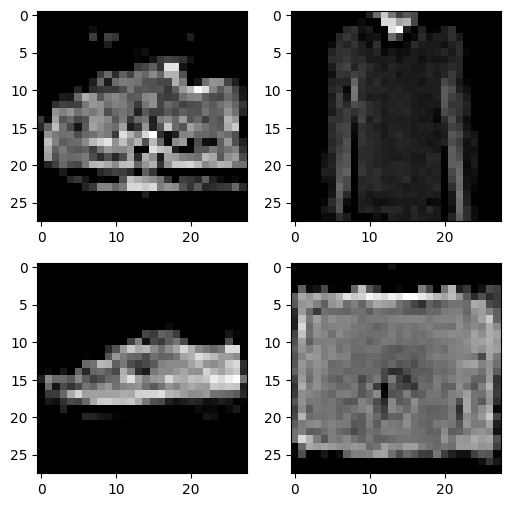

epoch time: 14.061270713806152

EPOCH 46
D loss: = 1.0455, G loss:  1.3098
epoch time: 9.101983547210693

EPOCH 47
D loss: = 0.8299, G loss:  1.2900
epoch time: 9.100983619689941

EPOCH 48
D loss: = 1.1041, G loss:  1.1375
epoch time: 9.048470258712769

EPOCH 49
D loss: = 0.9837, G loss:  1.2990
epoch time: 9.087483406066895

EPOCH 50
D loss: = 0.8864, G loss:  1.2845
D train accuracy: 74.73%, G train accuracy: (1.62)%
D val accuracy: 69.65%, G val accuracy: (1.69)%
D lr: 4e-05 G_lr 4e-05


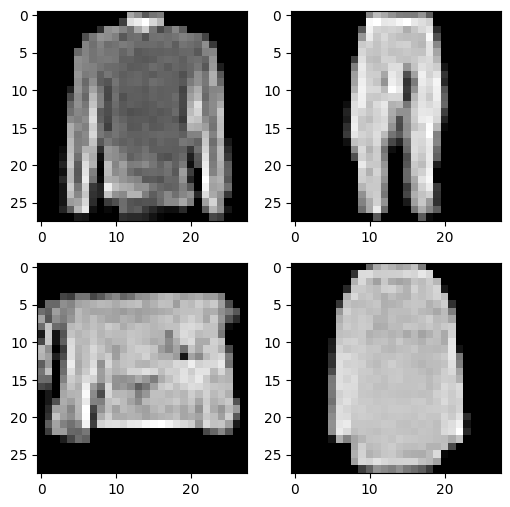

epoch time: 14.040799140930176

EPOCH 51
D loss: = 1.1531, G loss:  1.2070
epoch time: 9.119983673095703

EPOCH 52
D loss: = 1.2248, G loss:  1.1845
epoch time: 9.08829951286316

EPOCH 53
D loss: = 1.5383, G loss:  1.0003
epoch time: 9.036994457244873

EPOCH 54
D loss: = 1.1088, G loss:  1.3027
epoch time: 9.054015159606934

EPOCH 55
D loss: = 1.2274, G loss:  1.0590
D train accuracy: 62.79%, G train accuracy: (5.41)%
D val accuracy: 58.96%, G val accuracy: (5.43)%
D lr: 4e-05 G_lr 4e-05


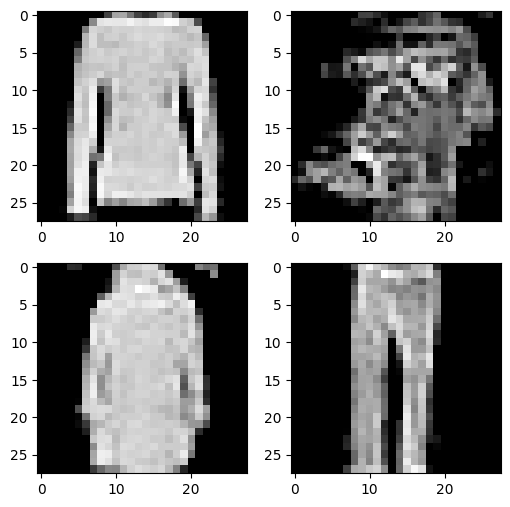

epoch time: 14.06099271774292

EPOCH 56
D loss: = 1.5729, G loss:  1.2371
epoch time: 9.08048391342163

EPOCH 57
D loss: = 1.2820, G loss:  1.2864
epoch time: 9.084516048431396

EPOCH 58
D loss: = 0.9358, G loss:  1.2557
epoch time: 9.112581968307495

EPOCH 59
D loss: = 0.9234, G loss:  1.2161
epoch time: 9.045099020004272

EPOCH 60
D loss: = 1.3534, G loss:  1.3093
D train accuracy: 72.10%, G train accuracy: (2.12)%
D val accuracy: 66.16%, G val accuracy: (2.19)%
D lr: 4e-05 G_lr 4e-05


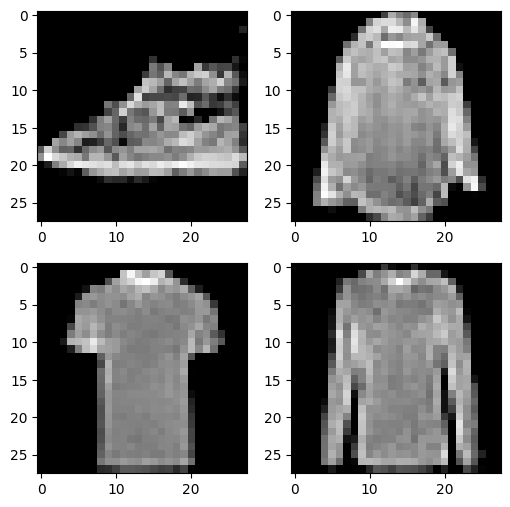

epoch time: 14.085334300994873

EPOCH 61
D loss: = 1.0184, G loss:  1.2134
epoch time: 9.084518194198608

EPOCH 62
D loss: = 1.0396, G loss:  1.2871
epoch time: 9.05298399925232

EPOCH 63
D loss: = 0.9428, G loss:  1.1769
epoch time: 9.06848692893982

EPOCH 64
D loss: = 1.2883, G loss:  0.9623
epoch time: 9.108346223831177

EPOCH 65
D loss: = 0.9824, G loss:  1.1561
D train accuracy: 69.30%, G train accuracy: (0.79)%
D val accuracy: 62.89%, G val accuracy: (0.86)%
D lr: 4e-05 G_lr 4e-05


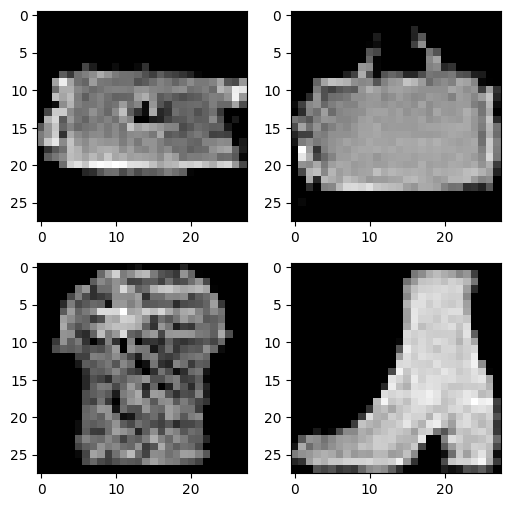

epoch time: 14.080627679824829

EPOCH 66
D loss: = 0.8824, G loss:  1.2749
epoch time: 8.867397546768188

EPOCH 67
D loss: = 0.8651, G loss:  1.3065
epoch time: 8.825484037399292

EPOCH 68
D loss: = 0.9551, G loss:  1.2355
epoch time: 8.846984148025513

EPOCH 69
D loss: = 0.8731, G loss:  1.2950
epoch time: 8.846743822097778

EPOCH 70
D loss: = 0.9627, G loss:  1.2870
D train accuracy: 70.60%, G train accuracy: (3.99)%
D val accuracy: 64.27%, G val accuracy: (4.16)%
D lr: 4e-05 G_lr 4e-05


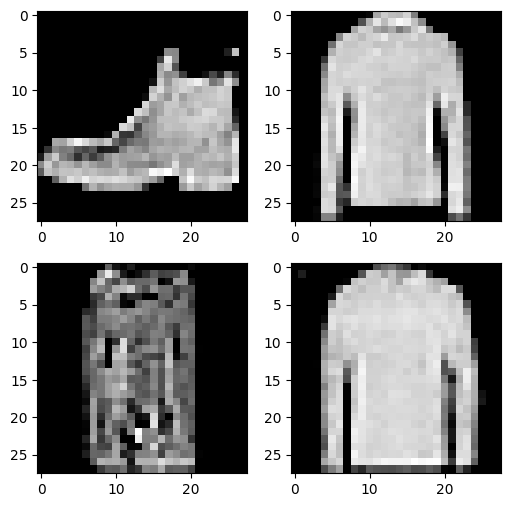

epoch time: 13.960024356842041

EPOCH 71
D loss: = 0.8604, G loss:  1.3124
epoch time: 9.042526721954346

EPOCH 72
D loss: = 1.0856, G loss:  1.3105
epoch time: 9.180983304977417

EPOCH 73
D loss: = 0.8757, G loss:  1.2315
epoch time: 9.037483930587769

EPOCH 74
D loss: = 1.3673, G loss:  1.1847
epoch time: 9.15139365196228


In [7]:
train_acc_D,train_acc_G,val_acc_D,val_acc_G,D_hist,G_hist,img_hist = train(D_model,G_model,trainLoader,valLoader,D_optimizer,G_optimizer,D_lossFunction,G_lossFunction,verbose=3,save_checkpoints=cfg.NAME,eval_every=cfg.EVAL_EVERY,G_train_rate=cfg.G_TRAIN_RATE)

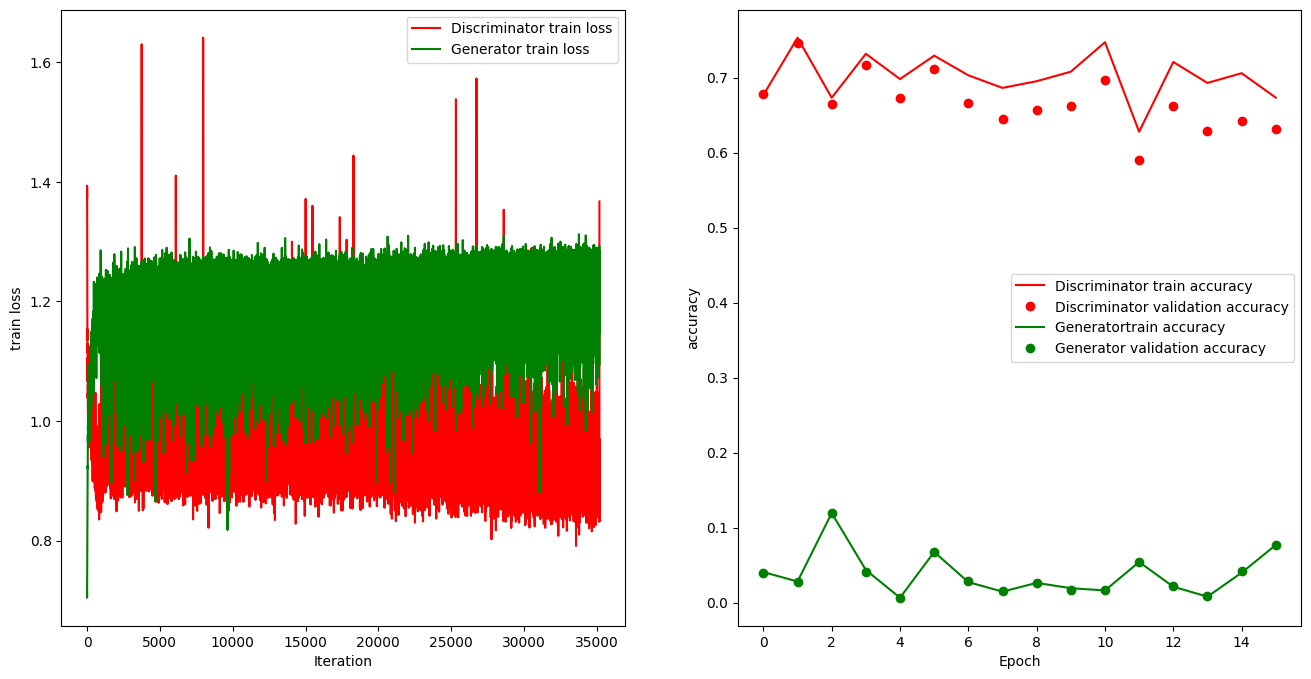

In [8]:

fig,axes = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)
axes[0].plot([i for i in D_hist["train_loss"]],'r',label="Discriminator train loss")
axes[0].plot([i for i in G_hist["train_loss"]],'g',label="Generator train loss")
axes[0].set_ylabel("train loss")
axes[0].set_xlabel("Iteration")
axes[0].legend(loc="best")


axes[1].plot(D_hist["train_accuracy"],'r',label="Discriminator train accuracy")
axes[1].plot(D_hist["val_accuracy"],'or',label="Discriminator validation accuracy")
axes[1].plot(G_hist["train_accuracy"],'g',label="Generatortrain accuracy")
axes[1].plot(G_hist["val_accuracy"],'og',label="Generator validation accuracy")
axes[1].set_ylabel("accuracy")
axes[1].set_xlabel("Epoch")
axes[1].legend(loc="best")
plt.show()


In [9]:
test_acc_D,test_acc_G = check_accuracy(testLoader,D_model,G_model)

In [10]:
print('Discriminator train accuracy: %.2f, Discriminator val accuracy: %.2f, Discriminator test accuracy: %.2f' % (100 * train_acc_D,100*val_acc_D,100*test_acc_D))
print('Generator train accuracy: %.2f, Generator val accuracy: %.2f, Generator test accuracy: %.2f' % (100 * train_acc_G,100*val_acc_G,100*test_acc_G))

Discriminator train accuracy: 67.34, Discriminator val accuracy: 63.22, Discriminator test accuracy: 63.07
Generator train accuracy: 7.68, Generator val accuracy: 7.67, Generator test accuracy: 8.30


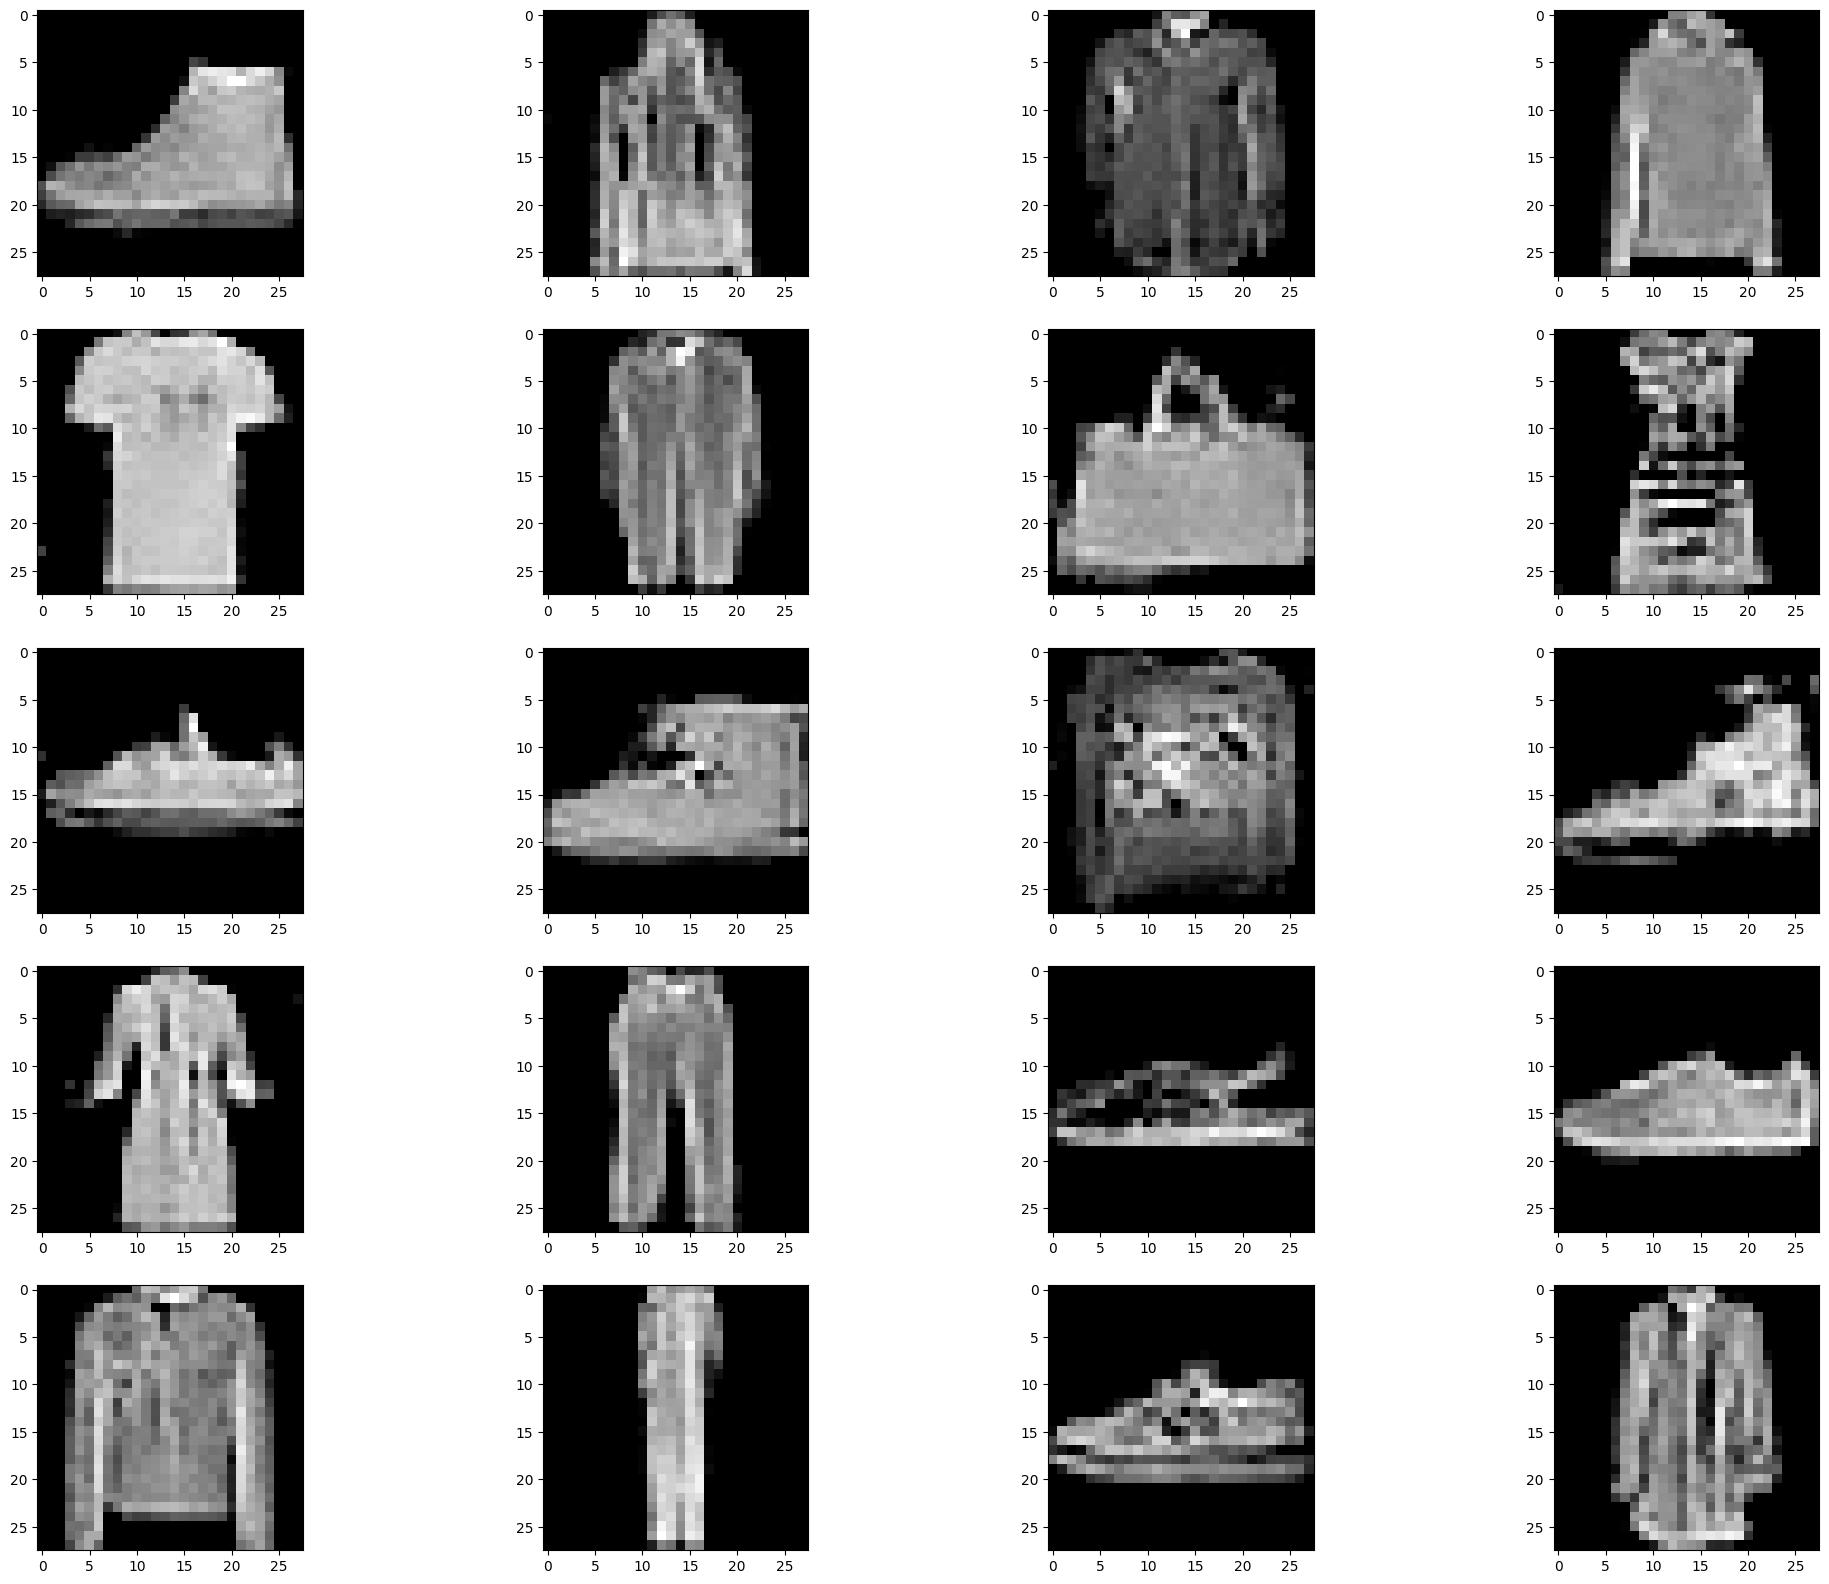

In [14]:
rows = 5
columns = 4

images = generate_samples(G_model,rows*columns)
fig, axes = plt.subplots(rows, columns)
fig.set_size_inches(5*rows,5*columns)
for i in range(rows):
    for j in range(columns):
        axes[i,j].imshow(images[i*columns + j],cmap="gray")

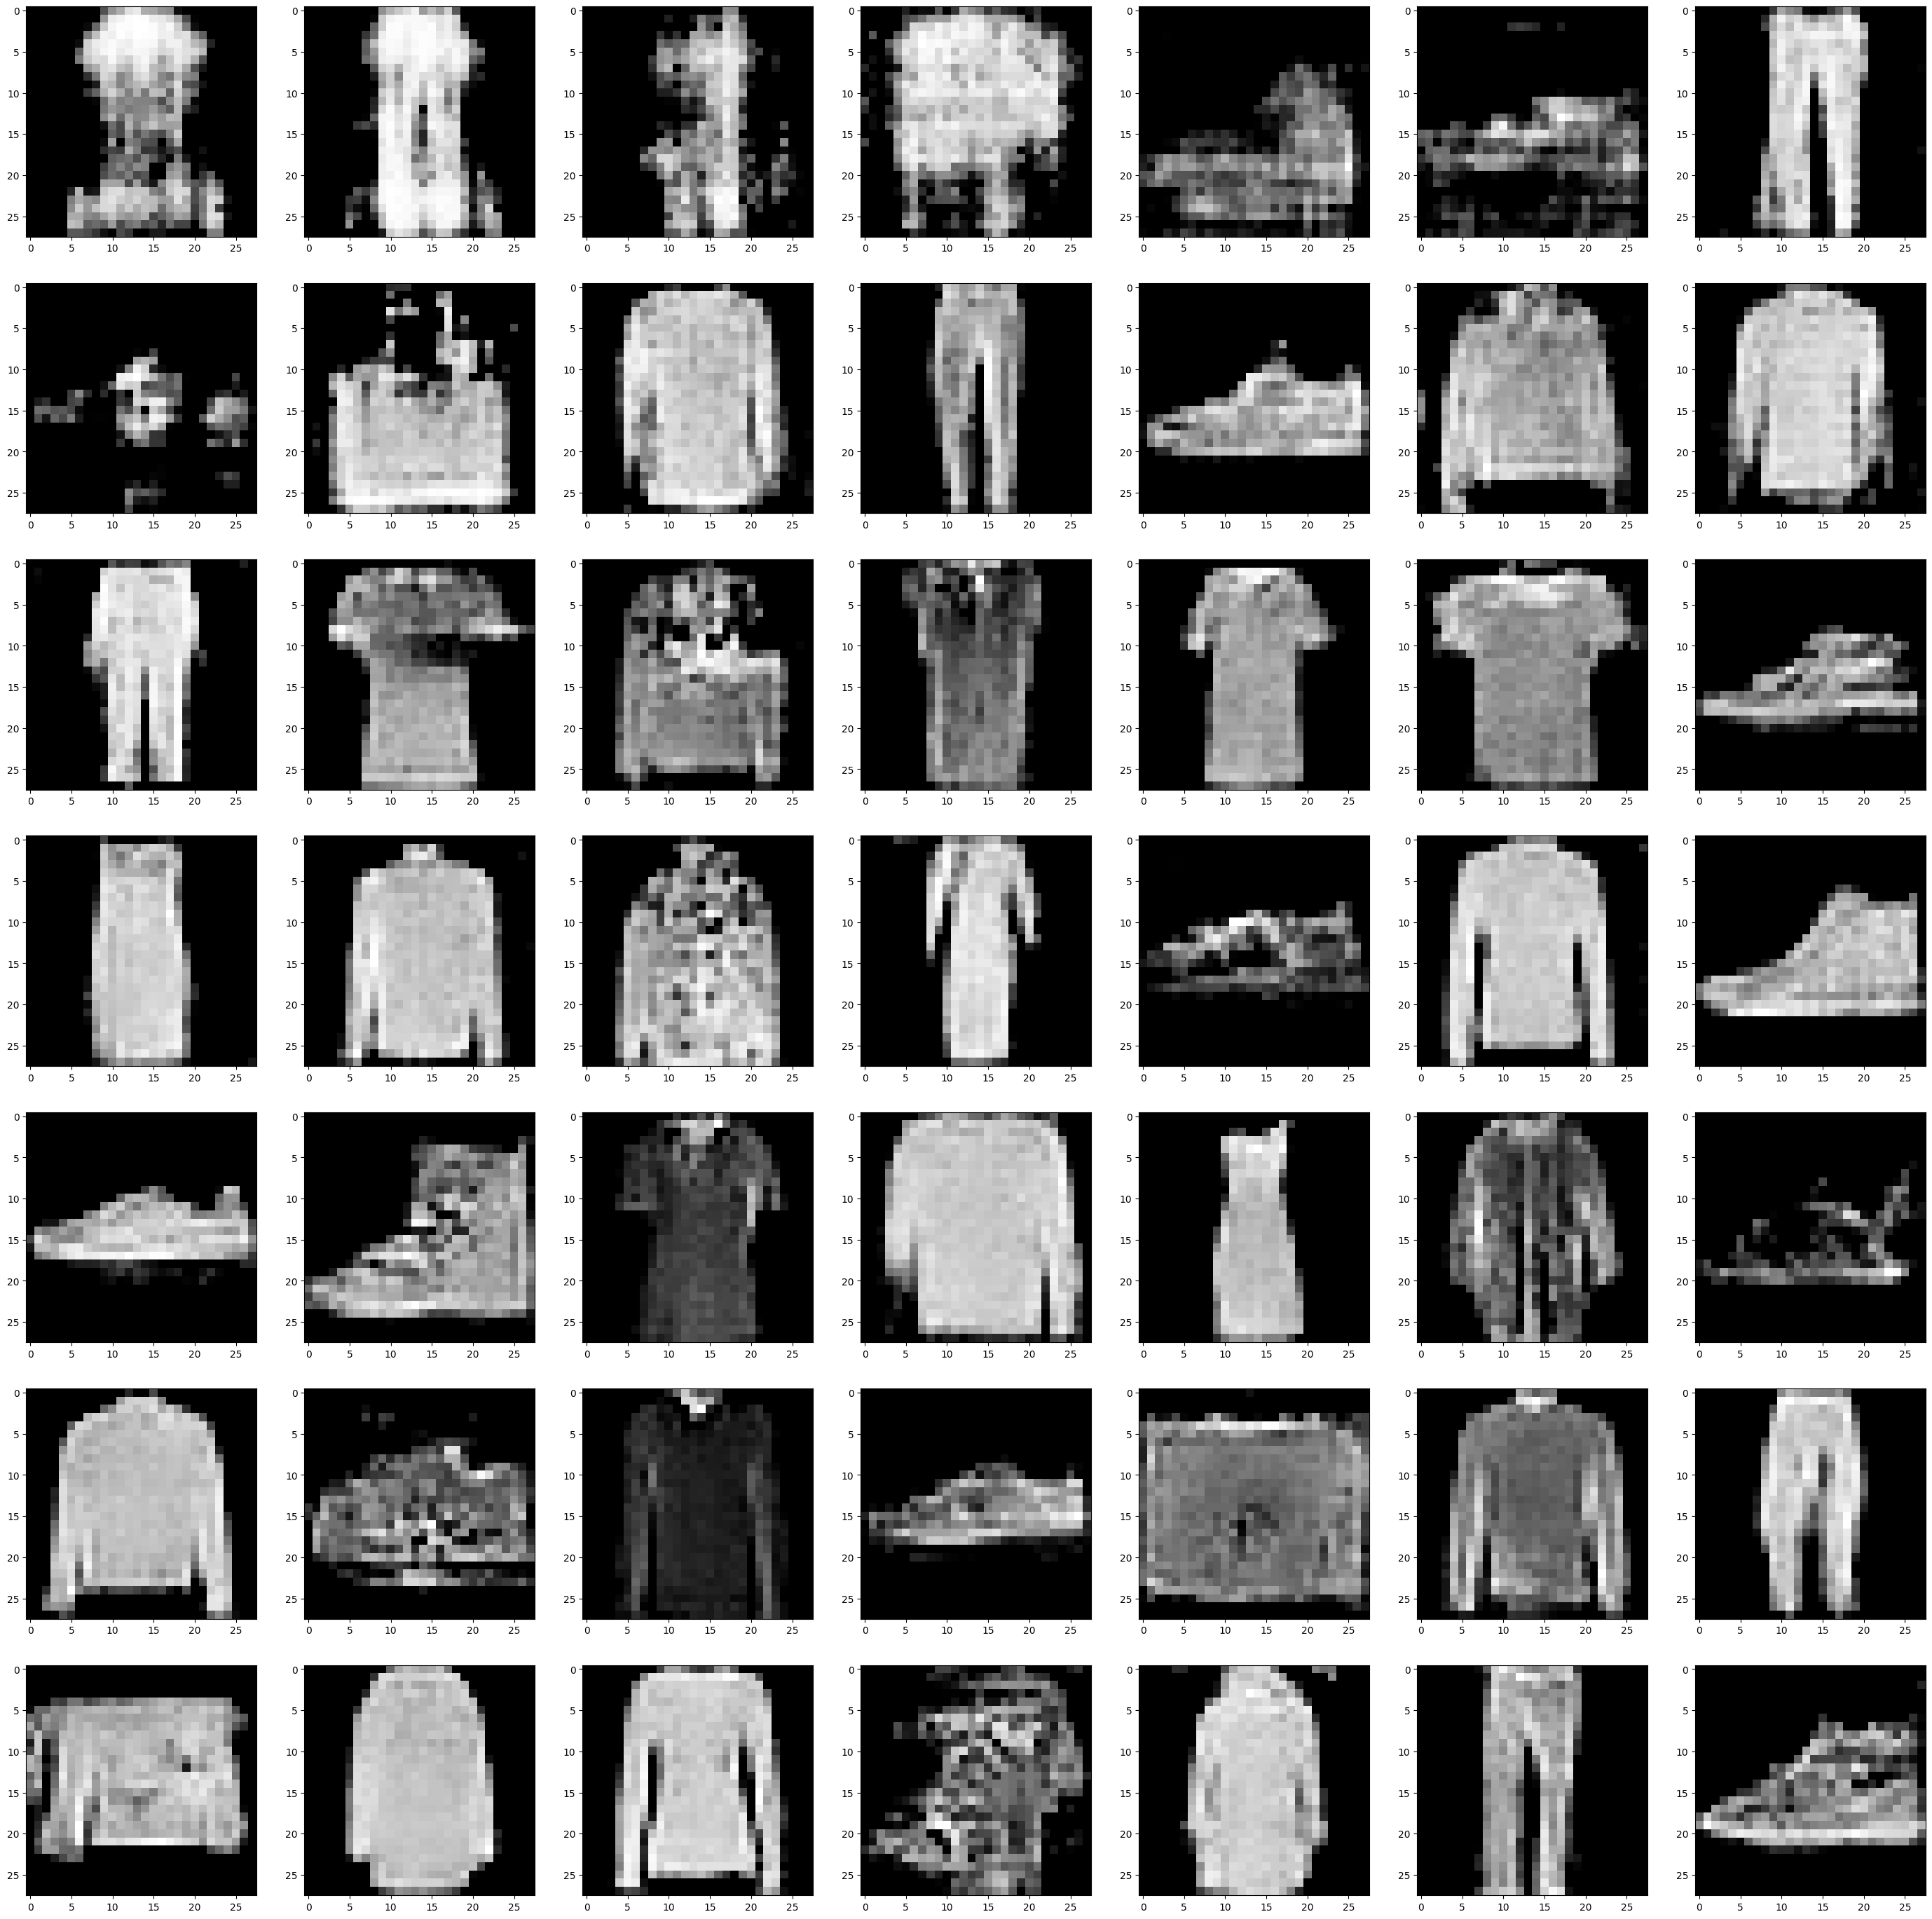

In [12]:
rows = min(10,int(np.sqrt(len(img_hist))))
columns = min(10,int(np.sqrt(len(img_hist))))

images = [img_hist[i*(int(len(img_hist)/(rows*columns)))] for i in range(rows*columns)]
idex =  [i*(int(len(img_hist)/(rows*columns))) for i in range(rows*columns)]
fig, axes = plt.subplots(rows, columns)
fig.set_size_inches(5*rows,5*columns)
for i in range(rows):
    for j in range(columns):
        axes[i,j].imshow(images[i*columns + j],cmap="gray")

In [13]:
torch.save(G_model,"checkpoints/G/"+cfg.NAME+".pth")